In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [3]:
#%matplotlib widget
%matplotlib inline

In [4]:
#from platform import python_version
#python_version()

In [5]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [6]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Teste_Inicial'

## Getting RA&DEC from Bica 2019

In [7]:
#df = pd.read_csv('../../lista.txt', comment= '#')
#ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]
ra, dec = 268.397084, -34.879677

## Querying the data

In [8]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [9]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [10]:
query = """SELECT 
source_id, ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.01))'

In [11]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [12]:
data = job.get_results()
len(data)

347

In [13]:
#data

## Converting to pandas

In [14]:
df = data.to_pandas()
df

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,4040800275540991872,268.407772,-34.876122,NaN,NaN,NaN,NaN,NaN,20.189930,NaN,NaN,NaN,NaN,355.766241,-4.503350
1,4040800275540975872,268.402804,-34.884082,1.931288,0.414506,-2.576164,0.27261,NaN,19.372055,-0.035004,0.360535,NaN,NaN,355.757283,-4.503828
2,4040800275541006592,268.401114,-34.886200,NaN,NaN,NaN,NaN,NaN,19.741150,NaN,NaN,NaN,NaN,355.754748,-4.503694
3,4040800168266345856,268.395558,-34.887311,NaN,NaN,NaN,NaN,1.812517,19.753252,NaN,NaN,NaN,NaN,355.751486,-4.500313
4,4040800168266347648,268.396416,-34.887812,NaN,NaN,NaN,NaN,NaN,20.216619,NaN,NaN,NaN,NaN,355.751406,-4.501173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,4040801031455373952,268.398991,-34.873427,NaN,NaN,NaN,NaN,2.530647,20.179447,NaN,NaN,NaN,NaN,355.764946,-4.495767
343,4040801031455384064,268.398460,-34.871153,NaN,NaN,NaN,NaN,NaN,20.103363,NaN,NaN,NaN,NaN,355.766697,-4.494248
344,4040801031455384448,268.394863,-34.871560,NaN,NaN,NaN,NaN,NaN,20.178070,NaN,NaN,NaN,NaN,355.764856,-4.491901
345,4040801031455384576,268.394542,-34.871802,NaN,NaN,NaN,NaN,NaN,20.308596,NaN,NaN,NaN,NaN,355.764513,-4.491795


In [15]:
#import plotly.express as px

In [16]:
#fig = px.scatter(x = df.pmra_error, y = df.pmra)
#fig.show()

In [17]:
%matplotlib inline

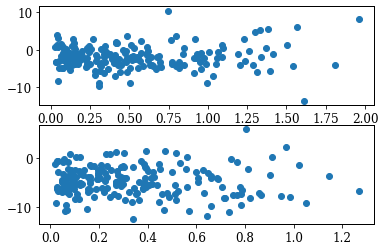

In [18]:
fig, ax = plt.subplots(2)

ax[0].scatter(df.pmra_error,df.pmra)
ax[1].scatter(df.pmdec_error,df.pmdec)

In [19]:
print(np.mean(df.pmdec), np.mean(df.pmdec_error)) ## por que pmra tem um erro muito maior?
print(np.mean(df.pmra), np.mean(df.pmra_error))

-4.683658732646079 0.3393067717552185
-1.9458227278409606 0.5149760246276855


## Applying better conditions to the variables

In [20]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error


df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(209, 347)

## Dropping uknown values of pmra, pmdec or parallax.

In [21]:
ndf = df_condicionado.dropna(how='any',subset=['pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax', 'parallax_error'])
ndf

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
6,4040800168266351104,268.398725,-34.888887,-2.257097,0.973352,-4.135809,0.606870,NaN,19.942860,-1.421871,0.695523,NaN,NaN,355.751429,-4.503351
8,4040800172357276160,268.398855,-34.889533,-5.418511,0.122114,-5.250222,0.084154,2.064598,17.000713,-0.230413,0.109713,NaN,NaN,355.750923,-4.503768
14,4040800172410291200,268.395832,-34.888774,-5.714326,0.313042,-6.187373,0.213173,NaN,18.702288,1.930472,0.275710,NaN,NaN,355.750331,-4.501242
20,4040800271118418304,268.399081,-34.885975,0.842268,0.044966,-0.595418,0.030184,1.444753,15.612697,0.708258,0.040521,NaN,NaN,355.754102,-4.502139
24,4040800271124206464,268.397958,-34.885922,-3.778880,0.110941,-7.385718,0.075498,2.130772,17.277798,0.207895,0.092295,NaN,NaN,355.753683,-4.501317
25,4040800271140079360,268.403564,-34.882443,-2.282344,0.177819,-5.147404,0.122501,1.669395,17.793655,0.966637,0.136169,NaN,NaN,355.759019,-4.503542
29,4040800271345529344,268.398306,-34.886899,-3.534206,0.105486,-3.682194,0.072946,1.635105,17.081642,0.178589,0.086706,NaN,NaN,355.752980,-4.502054
30,4040800271345529728,268.400928,-34.887084,0.691958,0.076330,-4.402248,0.052965,2.050879,16.633791,0.196318,0.070367,NaN,NaN,355.753904,-4.504006
35,4040800271345571200,268.401948,-34.887165,-4.487519,0.702858,-5.016258,0.389162,2.062065,19.644451,2.871489,0.774135,NaN,NaN,355.754256,-4.504771
50,4040800271345705472,268.404385,-34.878877,-4.331573,0.585392,-9.001147,0.446166,1.165340,19.428198,-1.726077,0.556281,NaN,NaN,355.762451,-4.502332


In [22]:
from sklearn.preprocessing import StandardScaler

## Creating the arrays to perform the 5-D HDBSCAN fit

In [23]:
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]

## Performing the HDBSCAN

In [24]:
import hdbscan

In [25]:
from sklearn.preprocessing import RobustScaler

scaled = RobustScaler().fit_transform(cincoD)

Estimated no. of clusters: 1
Estimated no. of noise points: 0
Estimated no. points clustered: 60


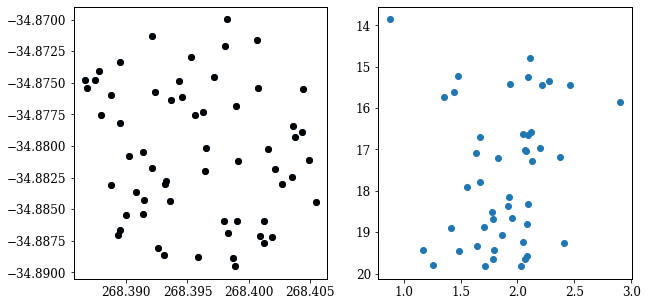

In [26]:
pts_expected = 300

clusterer = hdbscan.HDBSCAN(min_cluster_size = pts_expected, min_samples = 200, allow_single_cluster=True, cluster_selection_method = 'eom', metric = 'euclidean').fit(scaled)

#clusterer = hdbscan.HDBSCAN(min_cluster_size = 500, min_samples = 250, allow_single_cluster=True, cluster_selection_method = 'eom', metric = 'euclidean').fit(cincoD)

labels = clusterer.labels_


ndf = ndf.assign(labels=labels)


N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(clusterer.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(clusterer.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

subset = ndf[ndf.labels == 0]


fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(subset.ra,subset.dec, color = 'k', zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec)

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


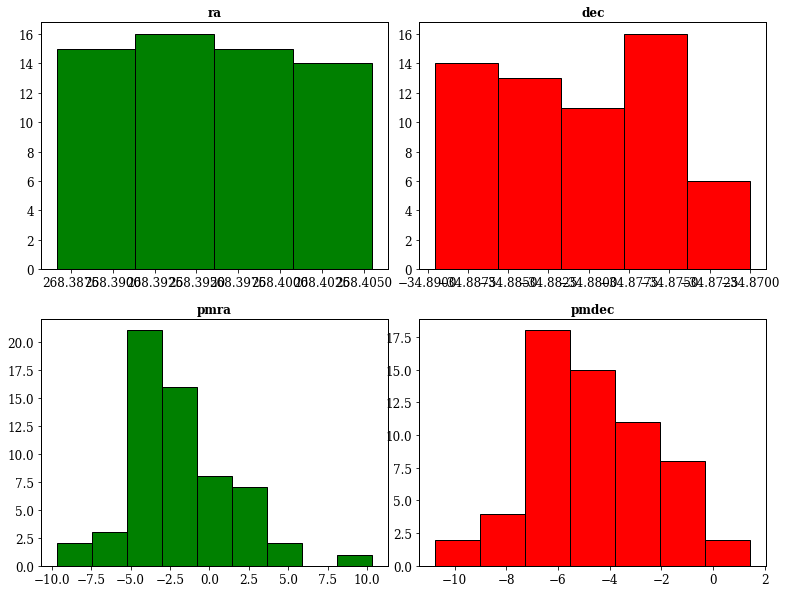

In [27]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


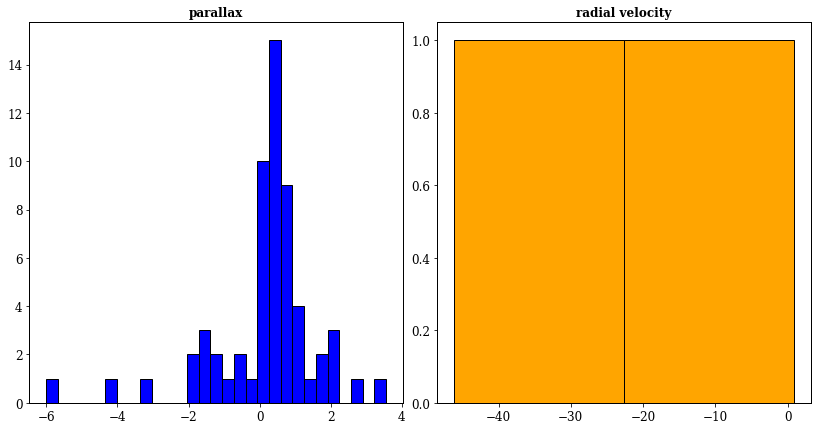

In [28]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Constructing a RDP and histograms of the clusters parameters

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

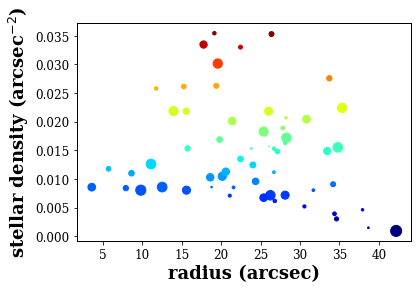

In [29]:
from astropy.coordinates import SkyCoord
from astropy import units
from sklearn.neighbors import NearestNeighbors


catalog = SkyCoord(ra=subset['ra']*units.degree, dec=subset['dec']*units.degree, frame='fk5')

nstar = len(subset)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([subset['ra']*np.cos(subset['dec']*np.pi/180.0), subset['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(subset['ra'], weights=den_data)
std_x = np.average((subset['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(subset['dec'], weights=den_data)
std_y = np.average((subset['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## Gaussian fit

In [30]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 29
    # variables        = 3
    chi-square         = 44.2185782
    reduced chi-square = 1.70071455
    Akaike info crit   = 18.2336266
    Bayesian info crit = 22.3355141
[[Variables]]
    amplitude:  13.7354826 +/- 1.07020436 (7.79%) (init = 15.34342)
    center:     0.49407650 +/- 0.03347460 (6.78%) (init = 0.4846053)
    sigma:      0.37184061 +/- 0.03340927 (8.98%) (init = 0.3409649)
    fwhm:       0.87561770 +/- 0.07867281 (8.98%) == '2.3548200*sigma'
    height:     14.7365965 +/- 1.14791019 (7.79%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


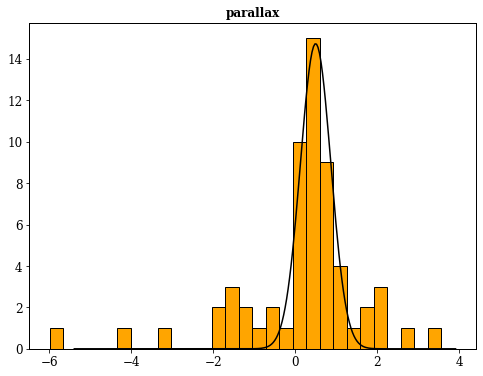

In [31]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0], histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(0.9*bins[0],1.1*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 4
    # variables        = 3
    chi-square         = 0.18362970
    reduced chi-square = 0.18362970
    Akaike info crit   = -6.32451360
    Bayesian info crit = -8.16563052
[[Variables]]
    amplitude:  0.95079686 +/- 0.18667574 (19.63%) (init = 0.01887327)
    center:     268.393508 +/- 0.00158504 (0.00%) (init = 268.3929)
    sigma:      0.02412437 +/- 0.00507989 (21.06%) (init = 0.003145544)
    fwhm:       0.05680854 +/- 0.01196223 (21.06%) == '2.3548200*sigma'
    height:     15.7232360 +/- 0.33092408 (2.10%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.997
    C(amplitude, center) = -0.657
    C(center, sigma)     = -0.642


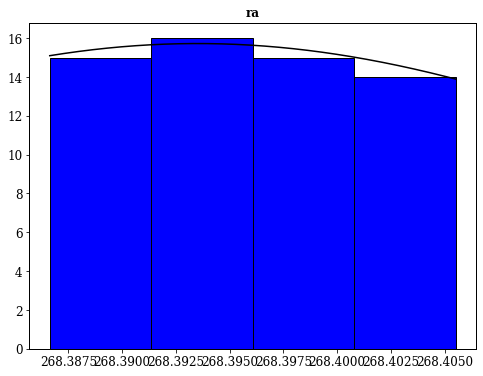

In [32]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 65
    # data points      = 9
    # variables        = 3
    chi-square         = 69.1923647
    reduced chi-square = 11.5320608
    Akaike info crit   = 24.3569935
    Bayesian info crit = 24.9486672
[[Variables]]
    amplitude:  135.438107 +/- 20.4675528 (15.11%) (init = 209.9439)
    center:    -3.23227623 +/- 0.47568674 (14.72%) (init = -4.689666)
    sigma:      2.72841643 +/- 0.47699295 (17.48%) (init = 3.332442)
    fwhm:       6.42492957 +/- 1.12323254 (17.48%) == '2.3548200*sigma'
    height:     19.8034250 +/- 2.99296160 (15.11%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.578


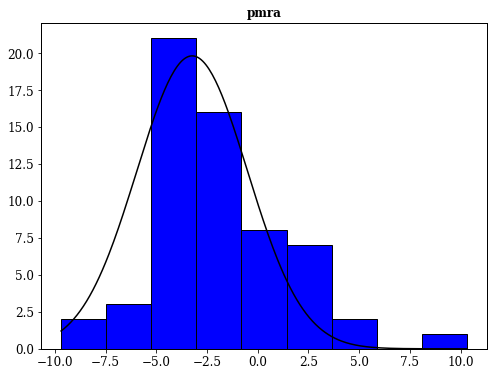

In [33]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 5
    # variables        = 3
    chi-square         = 35.7299394
    reduced chi-square = 17.8649697
    Akaike info crit   = 15.8327553
    Bayesian info crit = 14.6610691
[[Variables]]
    amplitude:  0.50880708 +/- 0.40151287 (78.91%) (init = 0.2200549)
    center:    -34.8843904 +/- 0.00852696 (0.02%) (init = -34.88301)
    sigma:      0.01454445 +/- 0.01270828 (87.38%) (init = 0.007335163)
    fwhm:       0.03424956 +/- 0.02992571 (87.38%) == '2.3548200*sigma'
    height:     13.9561586 +/- 2.78795123 (19.98%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.976
    C(amplitude, center) = -0.824
    C(center, sigma)     = -0.787


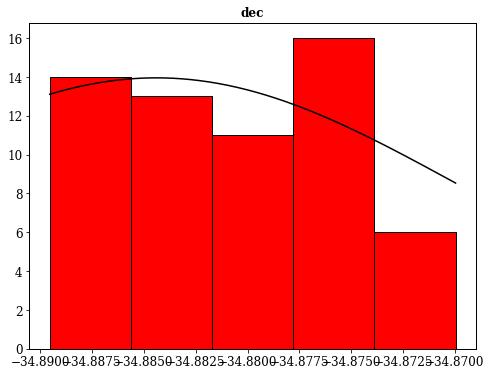

In [34]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 7
    # variables        = 3
    chi-square         = 37.1360070
    reduced chi-square = 9.28400176
    Akaike info crit   = 17.6807382
    Bayesian info crit = 17.5184687
[[Variables]]
    amplitude:  123.638709 +/- 17.3361611 (14.02%) (init = 97.71174)
    center:    -4.88878375 +/- 0.47276850 (9.67%) (init = -4.653242)
    sigma:      2.93745915 +/- 0.48109632 (16.38%) (init = 2.035661)
    fwhm:       6.91718756 +/- 1.13289525 (16.38%) == '2.3548200*sigma'
    height:     16.7916244 +/- 2.34535988 (13.97%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.587


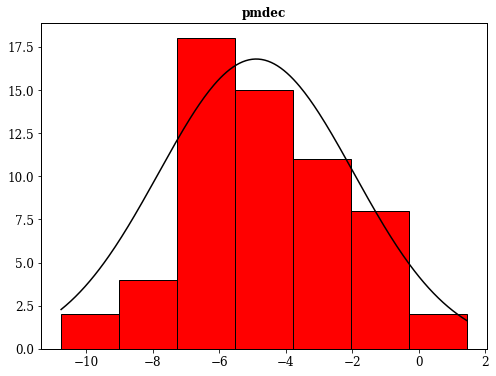

In [35]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=2

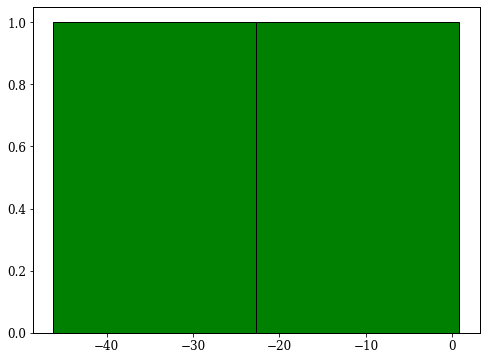

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()

## Sigma Clipping

500
301
283


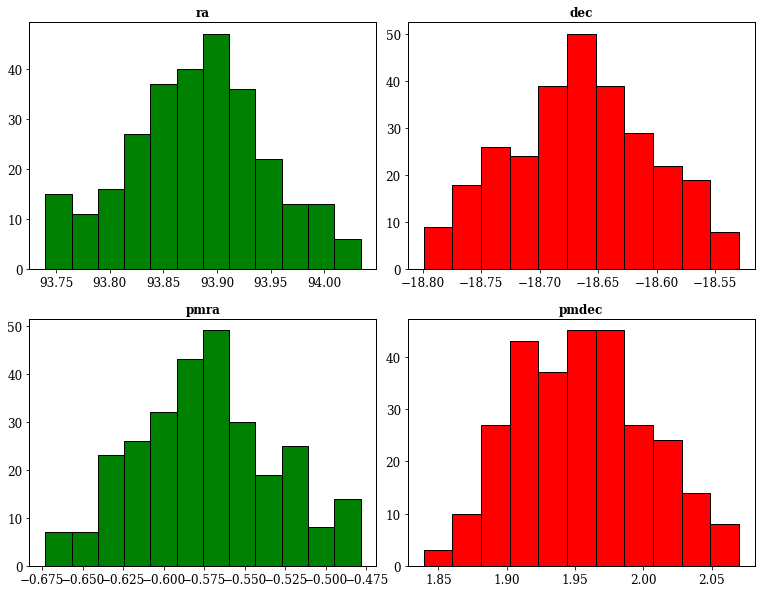

In [ ]:
gmodel = GaussianModel()
clip_loop = subset

for i in range(2):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]
    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]
    dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]
    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down) & (clip_loop.ra>ra_down) & (clip_loop.ra<ra_up) & 
                              (clip_loop.dec>dec_down) & (clip_loop.dec<dec_up) & (clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)  & (clip_loop.radial_velocity.isnull() | (clip_loop.radial_velocity>radvel_down) & (clip_loop.radial_velocity<radvel_up)) ]

    
print(len(clip_loop))

fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax1.hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax2.hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax3.hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax4.hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


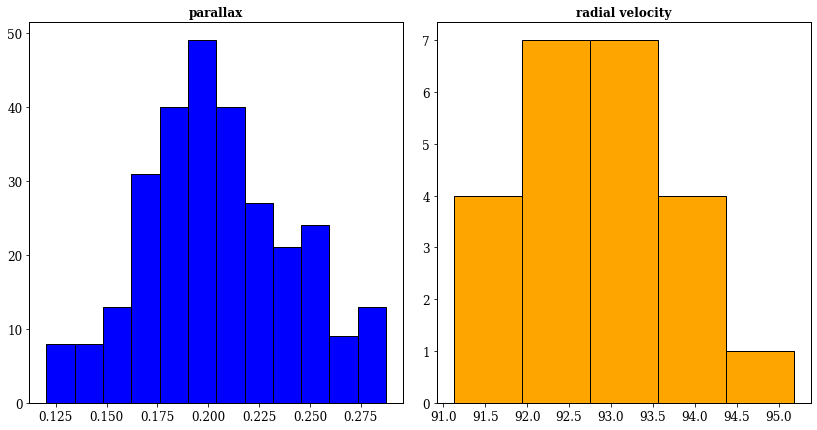

In [ ]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax1.hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

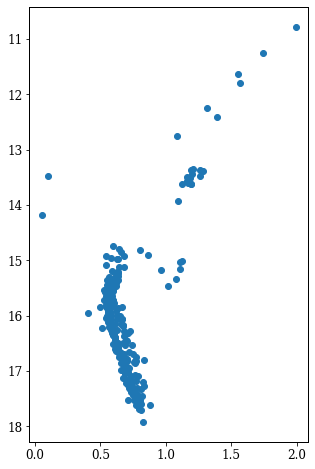

In [ ]:
plt.figure(figsize=(5,8))
plt.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'])
plt.gca().invert_yaxis()

In [ ]:
from astropy.coordinates import Distance

teste =  Distance(parallax=clip_loop['parallax'].to_numpy()*units.mas)

np.min(teste), np.max(teste)

(<Distance 3479.52395992 pc>, <Distance 8302.98980449 pc>)

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

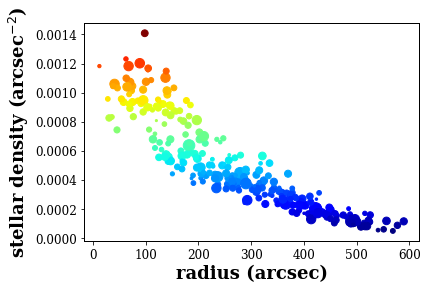

In [ ]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



In [ ]:
#final = df.loc[(df.parallax < paralaxe_up ) & (df.parallax > paralaxe_down) & (df.ra>ra_down) & (df.ra<ra_up) & 
#                              (df.dec>dec_down) & (df.dec<dec_up) & (df.pmra>pmra_down) & (df.pmra<pmra_up) & (df.pmdec>pmdec_down) 
#                              & (df.pmdec<pmdec_up)  & (df.radial_velocity.isnull() | (df.radial_velocity>radvel_down) & (df.radial_velocity<radvel_up)) ]

In [ ]:
#clip_loop.to_csv('final_5d.csv', index=False)

KeyError: 'ra'

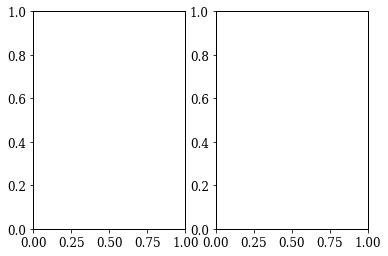

In [ ]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))


ax1.scatter(df['ra'],df['dec'], color = '#0055FF',s=(25-df.phot_g_mean_mag), alpha = 0.8)
ax1.set_xlim(93.5,94.25)
ax1.set_ylim(-19.05,-18.3)
ax1.scatter(clip_loop['ra'],clip_loop['dec'], color = 'red', s=(25-clip_loop.phot_g_mean_mag), zorder = 10)
ax1.set_ylabel('DEC [deg]', fontweight = 'bold')
ax1.set_xlabel('RA [deg]', fontweight = 'bold')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)




ax2.scatter(df['bp_rp'],df['phot_g_mean_mag'], color = 'None', edgecolor = '#0055FF', s = 20)
ax2.scatter(clip_loop['bp_rp'], clip_loop['phot_g_mean_mag'], color = 'None', edgecolor = 'red', s =20)
ax2.set_xlabel('BP - RP', fontweight = 'bold')
ax2.set_ylabel('G', fontweight = 'bold')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')
#ax2.grid()

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
#plt.savefig('teste.jpg', format = 'jpg', dpi = 300)

In [ ]:
cantat_table = pd.read_csv('table_cantat.csv')
cantat_table.head()

,_RAJ2000,_DEJ2000,_r,RA_ICRS,DE_ICRS,GaiaDR2,Plx,pmRA*,pmDE,RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,Simbad,_RA.icrs,_DE.icrs
0,93.860491,-18.767444,0.099543,93.860488,-18.767435,2941932991511094016,0.197095,-0.527752,1.958853,NaN,194,16.044838,0.546896,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6789.6300,Simbad,93.860491,-18.767444
1,93.938545,-18.751383,0.097415,93.938542,-18.751374,2941933270687739776,0.168874,-0.604769,2.125844,NaN,236,15.917546,0.616865,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,7150.8320,Simbad,93.938545,-18.751383
2,93.885737,-18.768380,0.098435,93.885734,-18.768372,2941933305047495808,0.136240,-0.536132,1.915721,NaN,204,16.611238,0.647436,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6560.0825,Simbad,93.885737,-18.768380
3,93.916233,-18.746306,0.082901,93.916231,-18.746297,2941933442486435328,0.278221,-0.553534,2.001318,NaN,226,15.243904,0.636387,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6298.5566,Simbad,93.916233,-18.746306
4,93.917962,-18.736131,0.074381,93.917959,-18.736124,2941933476846171008,0.100664,-0.618487,1.760824,NaN,220,16.019342,0.561467,0.8,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6759.6340,Simbad,93.917962,-18.736131


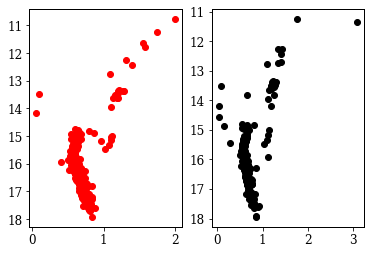

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))

ax1.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'red')
ax2.scatter(df['BP-RP'],df['Gmag'], color = 'k')
ax1.invert_yaxis()
ax2.invert_yaxis()

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

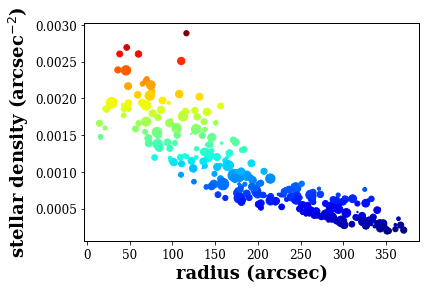

In [ ]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=cantat_table['_RAJ2000']*units.degree, dec=cantat_table['_DEJ2000']*units.degree, frame='fk5')

nstar = len(cantat_table)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([cantat_table['_RAJ2000']*np.cos(cantat_table['_DEJ2000']*np.pi/180.0), cantat_table['_DEJ2000']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(cantat_table['_RAJ2000'], weights=den_data)
std_x = np.average((cantat_table['_RAJ2000']-med_x)**2, weights=den_data)**0.5

med_y = np.average(cantat_table['_DEJ2000'], weights=den_data)
std_y = np.average((cantat_table['_DEJ2000']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(cantat_table['Gmag'])-cantat_table['Gmag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')

